# TMT4260 Modelling of Phase Transformations in Metals and Alloys

## Fall 2017

### Exercise 1

By Håkon W. Ånes

___

First we import useful libraries and declare figure parameters for making nice figures.

In [1]:
%matplotlib inline
import numpy as np
import scipy.integrate as sci
import scipy.special as scs
import matplotlib.pyplot as plt
import math
import warnings

warnings.filterwarnings('ignore')
fsize = 15
newparams = {'axes.titlesize': fsize, 'axes.labelsize': fsize,
             'axes.linewidth': 2, 'savefig.dpi': 200, 
             'lines.linewidth': 2.0, 'lines.markersize': 7, 
             'figure.figsize': (16, 5), 'figure.subplot.wspace': 0.4,
             'ytick.labelsize': fsize, 'xtick.labelsize': fsize,
             'ytick.major.pad': 3, 'xtick.major.pad': 3,
             'xtick.major.size': 2, 'ytick.major.size': 2,
             'legend.handlelength': 1.5, 'legend.fontsize': fsize}
plt.rcParams.update(newparams)

In [5]:
scs.factorial(500, exact=True)

1220136825991110068701238785423046926253574342803192842192413588385845373153881997605496447502203281863013616477148203584163378722078177200480785205159329285477907571939330603772960859086270429174547882424912726344305670173270769461062802310452644218878789465754777149863494367781037644274033827365397471386477878495438489595537537990423241061271326984327745715546309977202781014561081188373709531016356324432987029563896628911658974769572087926928871281780070265174507768410719624390394322536422605234945850129918571501248706961568141625359056693423813008856249246891564126775654481886506593847951775360894005745238940335798476363944905313062323749066445048824665075946735862074637925184200459369692981022263971952597190945217823331756934581508552332820762820023402626907898342451712006207714640979456116127629145951237229913340169552363850942885592018727433795173014586357570828355780158735432768888680120399882384702151467605445407663535984174430480128938313896881639487469658817504506926365338175

## 1. Implementing Stirling's Formula

Calculating exact values of factorials of large numbers poses no problem in Python when using libraries such as `scipy` or `numpy`. The implementation of Stirling's formula

$$
\ln{N!} \approx N\ln{N} - N,
$$

is therefore straight forward.

In [2]:
def stirling(N):
    return [i*math.log(i) - i for i in N]


def exact(N):
    return [math.log(scs.factorial(i, exact=True)) for i in N]

Declaring and calculating exact values and approximated values for $N$ from 0 to 10 000.

In [3]:
N = np.linspace(1, 1e4, 1e4+1, dtype=np.int64)
exact_N = exact(N)
stirling_N = stirling(N)

Creating plots of exact and approximated values and the relative error

$$
re_\mathrm{i} = \frac{\mathrm{exact_{i}} - \mathrm{stirling_{i}}}{N_\mathrm{i}},
$$

to check the validity of the approximation.

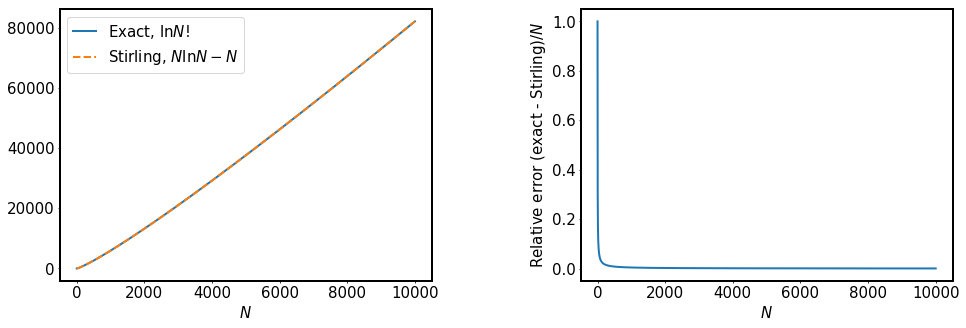

In [4]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(N, exact_N, label='Exact, $\ln{N!}$');
ax[0].plot(N, stirling_N, '--', label='Stirling, $N \ln{N} - N$');
ax[0].set_xlabel('$N$');
ax[0].legend();
ax[1].plot(N, np.subtract(exact_N, stirling_N)/N);
ax[1].set_xlabel('$N$');
ax[1].set_ylabel('Relative error (exact - Stirling)/$N$');

The relative error falls below $10\%$ after $N = 26$ and below $1\%$ after $N = 245$.

## 2. Calculating the Lattice Heat Capacity $C_\mathrm{V}$ of copper

Calculation of the definite integral in the Debye model is handled by `scipy.integration.quad` which uses a technique from the Fortran library `QUADPACK`. We define constants and declare one function of the Debye integrand to pass to `quad` and another function for calculating $C_\mathrm{V}$ using either the Debye or Einstein model.

In [5]:
R = 8.314472  # [J/(mol K)]
theta_ECu = 244  # [K]
theta_DCu = 315  # [K]


def debye_integrand(x):
    return x**4*(np.exp(x)/(np.exp(x) - 1)**2)


def heat_capacity(T, theta, model='debye'):
    if model=='debye':
        C_V = [9*R*(i/theta)**3*sci.quad(debye_integrand, 0, theta/i)[0] for i in T]
    else:
        C_V = [3*R*(theta/i)**2*(np.exp(theta/i)/(np.exp(theta/i) - 1)**2) for i in T]
    return C_V

Instead of just comparing the two models, we can also compare them to experimental data (White and Collocott, 1984).

In [6]:
C_V_exp = np.array([3.74, 6.14, 8.58, 10.83, 12.80, 14.49, 15.91, 18.11, 19.65, 20.78, 21.59, 22.23, 22.72, 23.07,
                     23.36, 23.58, 23.74, 24.02, 24.23, 24.44, 24.58, 24.70, 24.79, 24.87, 24.94, 25.03, 25.15,
                     25.30, 25.57, 25.98, 26.22, 26.80])
T_exp = np.array([40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 450, 500,
                  550, 600, 650, 700, 800, 900, 1000, 1100, 1200, 1250, 1300])

# Declare T values from 20 to 400
T = np.linspace(20, 400, 400 - 20 + 1)
threeR = np.full(len(T), 3*R)

We then calculate values for $C_\mathrm{V}$ using both models implemented above, and plot them.

In [7]:
C_V_E = heat_capacity(T, theta_ECu, model='einstein')
C_V_D = heat_capacity(T, theta_DCu)

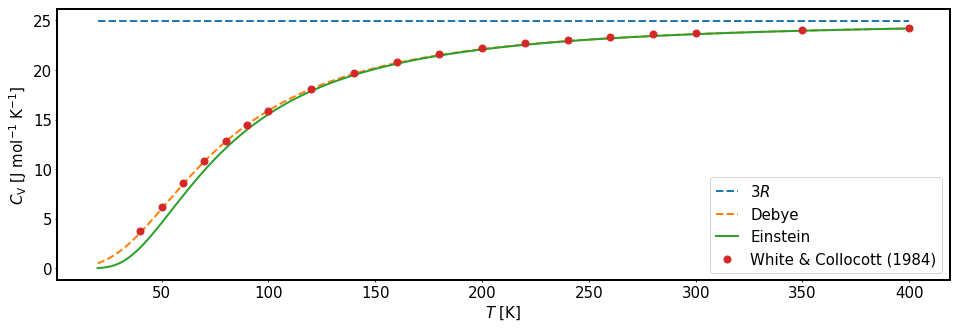

In [8]:
fig, ax = plt.subplots()
ax.plot(T, threeR, '--', label='$3R$')
ax.plot(T, C_V_D, '--', label='Debye')
ax.plot(T, C_V_E, label='Einstein')
ax.plot(T_exp[:19], C_V_exp[:19], 'o', label='White & Collocott (1984)')
ax.set_xlabel('$T$ [K]')
ax.set_ylabel('$C_\mathrm{V}$ [J mol$^{-1}$ K$^{-1}$]')
ax.legend()

The implemented Debye model describes the experimental results well, except for at very low temperatures which are best described by the Debye $T^3$ law.

## 3. Regular Solutions

### i. Free energy of mixing, $\Delta G_\mathrm{mix}$

We implement $\Delta H_\mathrm{mix}$, $T \Delta S_\mathrm{mix}$ and $\Delta G_\mathrm{mix}$, with the expression of the latter (assuming $G_\mathrm{A}^{0} = G_\mathrm{B}^{0} = 0$ and an endothermic reaction with $\Omega = 2000 R$)

$$
\Delta G_\mathrm{mix} = \Omega (1 - X_\mathrm{B}) X_\mathrm{B} + RT[(1 - X_\mathrm{B})\ln{(1 - X_\mathrm{B})} + X_\mathrm{B}\ln{X_\mathrm{B}}],
$$

and plot the free energy of mixing for the composition range $X_\mathrm{B} \in{[0.01, 0.99]}$ for constant temperatures 400 K, 500 K, 550 K, 600 K, 650 K and 700 K.

In [9]:
def enthalpy_mixing(Xb, omega=2000*R):
    return [omega*(1 - i)*i for i in Xb]


def entropy_mixing(Xb, T):
    return [R*T*((1 - i)*math.log(1 - i) + i*math.log(i)) for i in Xb]


def free_energy_mixing(Xb, T, omega=2000*R):
    return [omega*(1 - i)*i + R*T*((1 - i)*math.log(1 - i) + i*math.log(i)) for i in Xb]

In [10]:
Xb = np.linspace(0.01, 0.99, 101)
G_0 = np.full(len(Xb), 0)

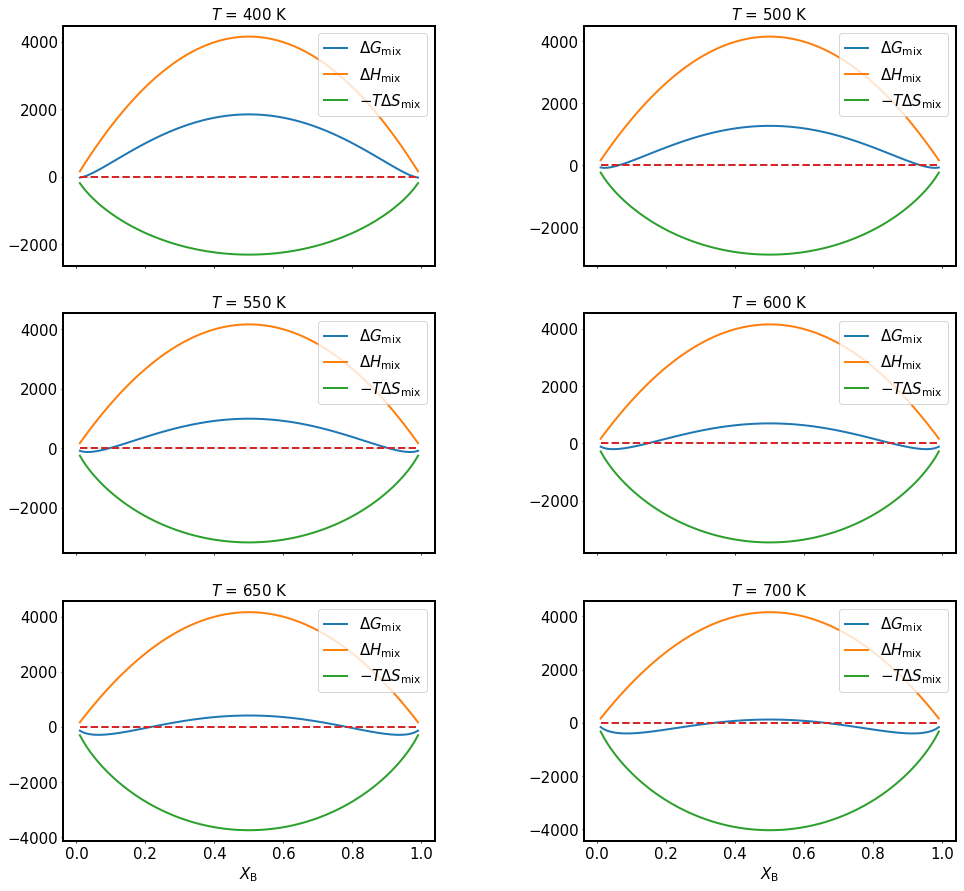

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(16, 15))

ax[0, 0].set_title('$T$ = 400 K')
ax[0, 0].plot(Xb, free_energy_mixing(Xb, 400), label='$\Delta G_\mathrm{mix}$')
ax[0, 0].plot(Xb, enthalpy_mixing(Xb), label='$\Delta H_\mathrm{mix}$')
ax[0, 0].plot(Xb, entropy_mixing(Xb, 400), label='$-T\Delta S_\mathrm{mix}$')
ax[0, 0].plot(Xb, G_0, '--')
ax[0, 0].legend()

ax[0, 1].set_title('$T$ = 500 K')
ax[0, 1].plot(Xb, free_energy_mixing(Xb, 500), label='$\Delta G_\mathrm{mix}$')
ax[0, 1].plot(Xb, enthalpy_mixing(Xb), label='$\Delta H_\mathrm{mix}$')
ax[0, 1].plot(Xb, entropy_mixing(Xb, 500), label='$-T\Delta S_\mathrm{mix}$')
ax[0, 1].plot(Xb, G_0, '--')
ax[0, 1].legend()

ax[1, 0].set_title('$T$ = 550 K')
ax[1, 0].plot(Xb, free_energy_mixing(Xb, 550), label='$\Delta G_\mathrm{mix}$')
ax[1, 0].plot(Xb, enthalpy_mixing(Xb), label='$\Delta H_\mathrm{mix}$')
ax[1, 0].plot(Xb, entropy_mixing(Xb, 550), label='$-T\Delta S_\mathrm{mix}$')
ax[1, 0].plot(Xb, G_0, '--')
ax[1, 0].legend()

ax[1, 1].set_title('$T$ = 600 K')
ax[1, 1].plot(Xb, free_energy_mixing(Xb, 600), label='$\Delta G_\mathrm{mix}$')
ax[1, 1].plot(Xb, enthalpy_mixing(Xb), label='$\Delta H_\mathrm{mix}$')
ax[1, 1].plot(Xb, entropy_mixing(Xb, 600), label='$-T\Delta S_\mathrm{mix}$')
ax[1, 1].plot(Xb, G_0, '--')
ax[1, 1].legend()

ax[2, 0].set_title('$T$ = 650 K')
ax[2, 0].plot(Xb, free_energy_mixing(Xb, 650), label='$\Delta G_\mathrm{mix}$')
ax[2, 0].plot(Xb, enthalpy_mixing(Xb), label='$\Delta H_\mathrm{mix}$')
ax[2, 0].plot(Xb, entropy_mixing(Xb, 650), label='$-T\Delta S_\mathrm{mix}$')
ax[2, 0].plot(Xb, G_0, '--')
ax[2, 0].legend()

ax[2, 1].set_title('$T$ = 700 K')
ax[2, 1].plot(Xb, free_energy_mixing(Xb, 700), label='$\Delta G_\mathrm{mix}$')
ax[2, 1].plot(Xb, enthalpy_mixing(Xb), label='$\Delta H_\mathrm{mix}$')
ax[2, 1].plot(Xb, entropy_mixing(Xb, 700), label='$-T\Delta S_\mathrm{mix}$')
ax[2, 1].plot(Xb, G_0, '--')
ax[2, 1].legend()

ax[2, 0].set_xlabel('$X_\mathrm{B}$')
ax[2, 1].set_xlabel('$X_\mathrm{B}$')

For the selected, large value $\Omega = 2000 R$, the negative curvature in the middle develops after about 400 K and diminishes after 700 K.

### ii. Phase-border between the single- and two-phase region, $X_\mathrm{B}^\mathrm{S}(T)$

The final expression for the solvus line $X_\mathrm{B}^\mathrm{S}(T)$ reads

$$
\frac{\mathrm{d}G}{\mathrm{d}X_\mathrm{B}}\Bigr|_{\substack{X_\mathrm{B} = X_\mathrm{B}^{\mathrm{S}}}} = 0 \rightarrow T(X_\mathrm{B}^\mathrm{S}) = \frac{\Omega}{R}\frac{2X_\mathrm{B}^\mathrm{S} - 1}{\ln{X_\mathrm{B}^\mathrm{S}} - \ln{(1 - X_\mathrm{B}^\mathrm{S})}}.
$$

In [12]:
def temperature(Xb, omega=2000*R):
    return [omega/R*(2*i - 1)/(math.log(i) - math.log(1 - i)) for i in Xb]

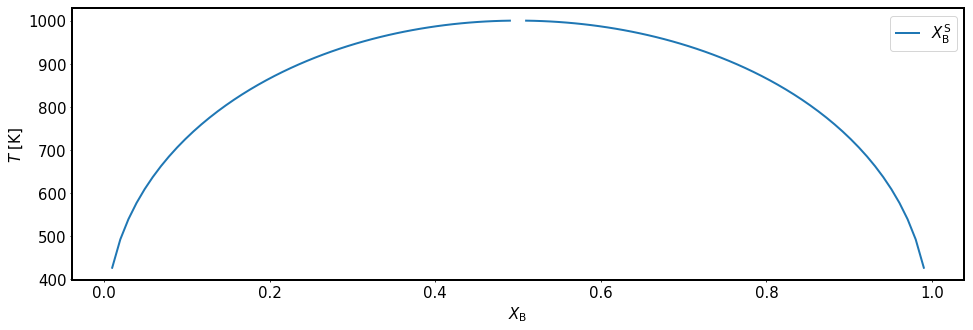

In [13]:
fig, ax = plt.subplots()
ax.plot(Xb, temperature(Xb), label='$X_\mathrm{B}^{\mathrm{S}}$')
ax.legend()
ax.set_xlabel('$X_\mathrm{B}$')
ax.set_ylabel('$T$ [K]')

The area below the curve is the two-phase region.
___

## References

White, G. K., & Collocott, S. J. (1984). Heat capacity of reference materials: Cu and W. Journal of physical and chemical reference data, 13(4), 1251-1257.